# Bayes- and Naive Bayes Classifier

> In this section and nearly all other parts of this course basic notions of **probability theory** are required. If you feel unsure about this, it is strongly recommended to study this [short intro in probability theory](https://hannibunny.github.io/probability/intro.html).  

In this notebook a Bayesian classifier for 1-dimensional input data is developed. The task is to predict the **category of car ($C_i$)**, a customers will purchase, if his **annual income ($x$)** is known. 

The classification shall be realized by applying Bayes-Theorem, which in this context is:

$$
P(C_i|x)=\frac{p(x|C_i)P(C_i)}{P(x)} = \frac{p(x|C_i)P(C_i)}{\sum_k p(x|C_k)P(C_k)}
$$

In the **training phase** the gaussian distributed likelihood $p(x|C_i)$ and the a-priori $P(C_i)$ for each of the 3 car classes $C_i$ is estimated from a sample of 27 training instances, each containing the annual income and the purchased car of a former customer. The file containing the training data can be ob obtained from [here](AutoKunden.txt)    

Required Python modules:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=5,suppress=True)

## Access labeled data
Read customer data from file. Each row in the file represents one custoner. The first column is the customer ID, the second column is the annual income of the customer and the third column is the class of car he or she bought: 

* 0 = Low Class
* 1 = Middle Class
* 2 = Premium Class

In [2]:
autoDF=pd.read_csv("AutoKunden.csv",index_col=0)#,header=None,names=["income","class"],sep="  ",index_col=0)

In [3]:
autoDF

,income,class
1,77017,2
2,69062,1
3,16558,0
4,88625,2
5,93726,2
6,66035,1
7,72293,2
8,14595,0
9,36797,1
10,65124,2


The above data shall be applied for training the classifier. **The trained model shall then be applied to classify customers, whose annual income is defined in the list below:**

In [4]:
AnnualIncomeList=[25000,29000,63000,69000] #customers with this annual income shall be classified

## Training
In the training-phase for each car-class $C_i$ the likelihood-function $p(x|C_i)$ and the a-priori probability $p(C_i)$ must be determined. It is assumed that the likelihoods are gaussian normal distributions. Hence, for each class the **mean** and the **standard-deviation** must be estimated from the given data. 

In [5]:
classStats=autoDF.groupby(by="class").agg({"class":"count","income":["mean","std"]})
classStats["apriori"]=classStats["class","count"].apply(lambda x:x/autoDF.shape[0])
classStats

class     income                 apriori
      count       mean           std          
class                                         
0         8  19651.625   5099.443609  0.296296
1        12  42385.000  17406.072645  0.444444
2         7  77884.000  10666.250044  0.259259

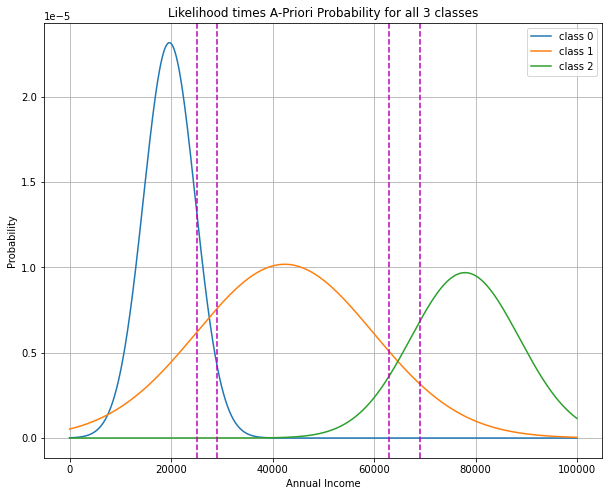

In [6]:
plt.figure(figsize=(10,8))
Aposteriori=[]
x=list(range(0,100000,100))
for c in classStats.index:
    p=classStats["apriori"].values[c]
    m=classStats["income"]["mean"].values[c]
    s=classStats["income"]["std"].values[c]
    likelihood = 1.0/(s * np.sqrt(2 * np.pi))*np.exp( - (x - m)**2 / (2 * s**2) )
    aposterioriMod=p*likelihood
    Aposteriori.append(aposterioriMod)
    plt.plot(x,aposterioriMod,label='class '+str(c))
plt.grid(True)
for AnnualIncome in AnnualIncomeList: #plot vertical lines at the annual incomes for which classification is required
    plt.axvline(x=AnnualIncome,color='m',ls='dashed')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Probability")
plt.title("Likelihood times A-Priori Probability for all 3 classes")
plt.show()

## Classification (Inference Phase)

Once the model is trained the likelihood $p(x|C_i)$ and the a-priori probability $P(C_i)$ is known for all 3 classes $C_i$. 

The most probable class is then calculated as follows: 

$$
C_{pred} = argmax_{C_i}\left( \frac{p(x|C_i) \cdot p(C_i)}{p(x)}\right) = argmax_{C_i}\left( \frac{p(x|C_i)P(C_i)}{\sum_k p(x|C_k)P(C_k)}\right) 
$$

In the code-cell below, customers with incomes of $25.000.-,29000.-,63000.-$ and $69000.-$ Euro are classified by the learned model:

In [7]:
for AnnualIncome in AnnualIncomeList:
    print('-'*20)
    print("Annual Income = %7.2f"%AnnualIncome)
    i=int(round(AnnualIncome/100))
    proVal=[x[i] for x in Aposteriori]
    sumProbs=np.sum(proVal)
    for i,p in enumerate(proVal):
        print('APosteriori propabilitiy of class %d = %1.4f'% (i,p/sumProbs))
    print('Most probable class for customer with income %5.2f Euro is %d '% (AnnualIncome,np.argmax(np.array(proVal))))

--------------------
Annual Income = 25000.00
APosteriori propabilitiy of class 0 = 0.6837
APosteriori propabilitiy of class 1 = 0.3163
APosteriori propabilitiy of class 2 = 0.0000
Most probable class for customer with income 25000.00 Euro is 0 
--------------------
Annual Income = 29000.00
APosteriori propabilitiy of class 0 = 0.3630
APosteriori propabilitiy of class 1 = 0.6370
APosteriori propabilitiy of class 2 = 0.0000
Most probable class for customer with income 29000.00 Euro is 1 
--------------------
Annual Income = 63000.00
APosteriori propabilitiy of class 0 = 0.0000
APosteriori propabilitiy of class 1 = 0.5797
APosteriori propabilitiy of class 2 = 0.4203
Most probable class for customer with income 63000.00 Euro is 1 
--------------------
Annual Income = 69000.00
APosteriori propabilitiy of class 0 = 0.0000
APosteriori propabilitiy of class 1 = 0.3159
APosteriori propabilitiy of class 2 = 0.6841
Most probable class for customer with income 69000.00 Euro is 2 


## Bayesian Classification with Scikit-Learn
For Bayesian Classification Scikit-Learn provides Naive Bayes Classifiers for Gaussian-, Bernoulli- and Multinomial distributed data. In the example above 1-dimensional Gaussian distributed input-data has been applied. In this case the Scikit-Learn Naive Bayes Classifier for Gaussian-distributed data, `GaussianNB` learns the same model as the classifier implemented in the previous sections of this notebook. This is demonstrated in the following code-cells:

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
Income = np.atleast_2d(autoDF.values[:,0]).T
labels = autoDF.values[:,1]

### Train the Naive Bayes Classifier:

In [10]:
clf=GaussianNB()
clf.fit(Income,labels)

GaussianNB()

The parameters mean and standarddeviation of the learned likelihoods are:

In [11]:
print("Learned mean values for each of the 3 classes: \n",clf.theta_)
print("Learned standard deviations for each of the 3 classes: \n",np.sqrt(clf.sigma_))
print("Note that std is slightly different as above. This is because std of pandas divides by (N-1)")

Learned mean values for each of the 3 classes: 
 [[19651.625]
 [42385.   ]
 [77884.   ]]
Learned standard deviations for each of the 3 classes: 
 [[ 4770.09278]
 [16665.04581]
 [ 9875.02871]]
Note that std is slightly different as above. This is because std of pandas divides by (N-1)


### Use the trained model for predictions

In [12]:
Income=np.atleast_2d(AnnualIncomeList).T
predictions=clf.predict(Income)
for inc,pre in zip(AnnualIncomeList,predictions):
    print("Most probable class for annual income of %7d.-Euro is %2d"%(inc,pre))

Most probable class for annual income of   25000.-Euro is  0
Most probable class for annual income of   29000.-Euro is  1
Most probable class for annual income of   63000.-Euro is  1
Most probable class for annual income of   69000.-Euro is  2


The `predict(input)`-method returns the estimated class for the given input. If the a-posteriori probability $P(C_i|\mathbf{x})$ is of interest, the `predict_proba(input)`-method can be applied:

In [13]:
predictionsProb=clf.predict_proba(Income)
for i,inc in enumerate(AnnualIncomeList):
    print("A-Posteriori for class 0: %1.3f ; class 1: %1.3f ; class 3 %1.3f for user with income %7d"%(predictionsProb[i,0], predictionsProb[i,1],predictionsProb[i,2],inc))

A-Posteriori for class 0: 0.682 ; class 1: 0.318 ; class 3 0.000 for user with income   25000
A-Posteriori for class 0: 0.320 ; class 1: 0.680 ; class 3 0.000 for user with income   29000
A-Posteriori for class 0: 0.000 ; class 1: 0.595 ; class 3 0.405 for user with income   63000
A-Posteriori for class 0: 0.000 ; class 1: 0.298 ; class 3 0.702 for user with income   69000


### Model Accuracy on training data

In [14]:
Income=np.atleast_2d(autoDF.values[:,0]).T
predictions=clf.predict(Income)

In [15]:
correctClassification=predictions==labels
print(correctClassification)

[ True False  True  True  True False  True  True  True  True  True False
  True  True  True  True False  True  True  True  True False  True  True
 False  True  True]


In [16]:
numCorrect=np.sum(correctClassification)

In [17]:
accuracyTrain=float(numCorrect)/autoDF.shape[0]
print("Accuracy on training data is: %1.3f"%accuracyTrain)

Accuracy on training data is: 0.778


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=labels,y_pred=predictions)

array([[7, 1, 0],
       [3, 7, 2],
       [0, 0, 7]])

In the confusion matrix the entry $C_{i,j}$ in row $i$, column $j$ is the number of instances, which are known to be in class $i$, but predicted to class $j$. For example the confusion matrix above indicates, that 3 elements of true class $1$ have been predicted as class $0$-instances.   

### Cross Validation
The accuracy on training data should not be applied for model evaluation. Instead a model should be evaluated by determining the accuracy (or other performance figures) on data, which has not been applied for training. Since we have only few labeled data in this example cross-validation is applied for determining the model's accuracy:

In [19]:
from sklearn.model_selection import cross_val_score
clf=GaussianNB()
print(cross_val_score(clf,Income,labels))

[0.66667 0.66667 0.8     0.8     0.8    ]


### Naive Bayes Classifier for Multidimensional data
In the playground-example above the input-features where only one dimensional: The only input feature has been the annual income of a customer. The 1-dimensional case is quite unusual in practice. In the code-cell below a **Naive Bayes Classifier** is evaluated for multidimensional data. This is just to demonstrate that the same process as applied above for the simple dataset, can also be applied for arbitrary complex datasets.

Again we start from the Bayes Theorem:

$$
P(C_i|\mathbf{x})=\frac{p(\mathbf{x}|C_i)P(C_i)}{P(\mathbf{x})}.
$$

However, the crucial difference to the simple example above is, that not only one random variable $X$ constitutes the input, but many many random variables $X_1,X_2,\ldots,X_N$. I.e a concrete input is a vector 

$$
\mathbf{x}=(x_{i_1},x_{i_1},\ldots,x_{i_N})
$$

The problem is then: **Of what type is the N-dimensional likelihood $p(\mathbf{x}|C_i)$ and how to estimate this likelihood?**

For the general case, where some of the input variables are discrete and others are numeric, there does not exist a joint-likelihood. Therefore, one **naively** assumes that all input variables $X_i$ are independent of each other. Then the N-dimensional likelihood $p(\mathbf{x}|C_i)$ can be factorised into $N$ 1-dimensional likelihoods and these 1-dimenensional likelihoods can be easily estimated from the given training data (as shown above). This is the widely applied **Naive Bayes Classifier:**

$$
P(C_i|\mathbf{x})=\frac{p(\mathbf{x}|C_i)}{P(\mathbf{x})}P(C_i) = \frac{\prod_{j=1}^N p(x_j|C_i)}{P(\mathbf{x})} P(C_i)
$$

 
Below, we apply the [wine dataset](wine.data). This dataset is described [here](wine.names.txt). Actually it is also relatively small, but it contains multidimensional data. 


In the dataset the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of $N=13$ constituents found in each of the three types of wines. The task is to predict the wine-type (first column of the dataset) from the 13 features, that have been obtained in the chemical analysis.

In [20]:
import pandas as pd
wineDataFrame=pd.read_csv("wine.data",header=None)
wineDataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
wineData=wineDataFrame.values

In [22]:
print(wineData.shape)

(178, 14)


In [23]:
features=wineData[:,1:] #features are in columns 1 to end
labels=wineData[:,0] #class label is in column 0

In [24]:
clf=GaussianNB()
acc=cross_val_score(clf,features,labels,cv=5)

In [25]:
print("Mean Accuracy is ",acc.mean())

Mean Accuracy is  0.9663492063492063
